## This is the second model that will be part of a multi-modal DL model consisting of 3 models

This model will process map images.

##### 1. importing necessary libraries

In [15]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv
import time
from PIL import Image
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [16]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.allow_soft_placement = True

1.1. we import the data

In [17]:
# Load the data
df = pd.read_csv('../frameRecorder/data.csv')

df.head()

,image_id,a,w,s,d,wa,wd,sa,sd
0,1682192671794,0,0,0,0,0,0,0,0
1,1682192671850,0,0,0,0,0,0,0,0
2,1682192671914,0,0,0,0,0,0,0,0
3,1682192671967,0,1,0,0,0,0,0,0
4,1682192672015,0,1,0,0,0,0,0,0


In [18]:
X, y = df.iloc[:, 0], df.iloc[:, 1:]
print(X[0:10])
print(X.shape)
print(y.shape)

0    1682192671794
1    1682192671850
2    1682192671914
3    1682192671967
4    1682192672015
5    1682192672065
6    1682192672113
7    1682192672165
8    1682192672215
9    1682192672265
Name: image_id, dtype: int64
(19190,)
(19190, 8)


In [19]:
XX = []
for i in X:
    img = cv.imread('../frameRecorder/screenshots/' + str(i) + "_map.png")
    img = img / 255.0
    XX.append(img)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [21]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
X_train = X_train.reshape(-1, img.shape[0], img.shape[1], 3)
X_val = X_val.reshape(-1, img.shape[0], img.shape[1], 3)
X_test = X_test.reshape(-1, img.shape[0], img.shape[1], 3)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(12281, 100, 145, 3)
(3838, 100, 145, 3)
(3071, 100, 145, 3)


2. We create the model

In [28]:
with tf.compat.v1.Session(config=config) as sess:
    model = Sequential([
        Conv2D(22, kernel_size=(3, 3), activation='relu', input_shape=(100, 145, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(28, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(34, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(40, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Flatten(),
        Dense(100, activation='relu'),
        Dense(50, activation='relu'),
        Dense(15, activation='relu'),
        Dense(8, activation='softmax')
    ])

3. We compile the model

In [29]:
# compile the model
with tf.compat.v1.Session(config=config) as sess:
    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize the model
    model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 98, 143, 22)       616       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 49, 71, 22)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 47, 69, 28)        5572      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 23, 34, 28)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 21, 32, 34)        8602      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 10, 16, 34)      

4. We train the model

Train on 12281 samples, validate on 3071 samples
Epoch 1/100
12224/12281 [============================>.] - ETA: 0s - loss: 0.2320 - accuracy: 0.9172
Epoch 1: val_accuracy improved from -inf to 0.92173, saving model to model_2_8_3.h5
12281/12281 [==============================] - 10s 783us/sample - loss: 0.2318 - accuracy: 0.9173 - val_loss: 0.1835 - val_accuracy: 0.9217
Epoch 2/100
12224/12281 [============================>.] - ETA: 0s - loss: 0.1840 - accuracy: 0.9251
Epoch 2: val_accuracy improved from 0.92173 to 0.92832, saving model to model_2_8_3.h5
12281/12281 [==============================] - 8s 689us/sample - loss: 0.1839 - accuracy: 0.9251 - val_loss: 0.1794 - val_accuracy: 0.9283
Epoch 3/100
12224/12281 [============================>.] - ETA: 0s - loss: 0.1770 - accuracy: 0.9281
Epoch 3: val_accuracy improved from 0.92832 to 0.92946, saving model to model_2_8_3.h5
12281/12281 [==============================] - 8s 657us/sample - loss: 0.1769 - accuracy: 0.9281 - val_loss: 0.

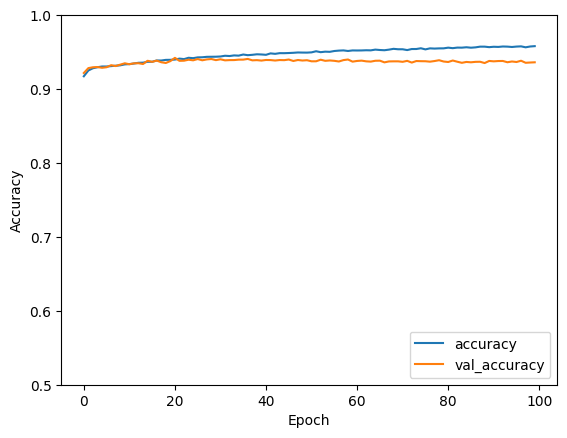

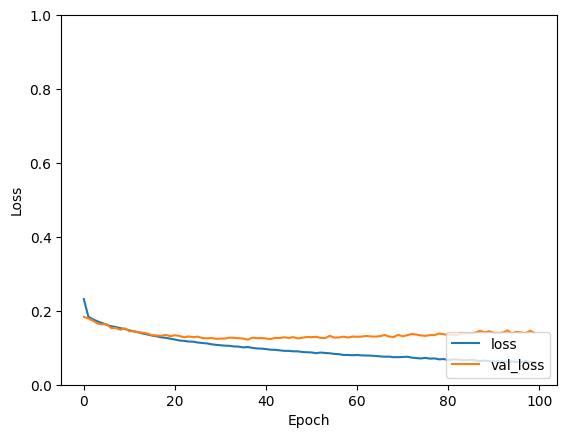

In [30]:
# train the model
with tf.compat.v1.Session(config=config) as sess:
    # define early stopping callback
    checkpoint = tf.keras.callbacks.ModelCheckpoint('model_2_8_3.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    
    # fit the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, callbacks=[checkpoint])

    # evaluate the model
    loss, acc = model.evaluate(X_test, y_test, verbose=2)
    print('Test Accuracy: {}'.format(acc))
    print('Test Loss: {}'.format(loss))

    # plot the accuracy
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.show()

    # plot the loss
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

5. We load the model

In [26]:
model_test = tf.keras.models.load_model('model_2_8_3.h5')

6. We predict the test data

1/1 [==============================] - 0s 100ms/step
[0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 ]
Prediction time: 0.16081476211547852


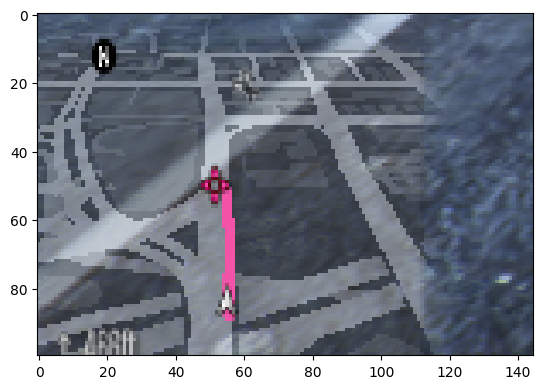

In [27]:
# predict the test data
t1 = time.time()
prediction = model_test.predict(np.array([XX[11000]]))
t2 = time.time()
print('[', end='')
for(i, j) in enumerate(prediction[0]):
    print(f'{round(j, 2)}', end=' ')
print(']')
    
print(f'Prediction time: {t2 - t1}')

# plot the image and the prediction
plt.imshow(XX[11000])
plt.show()

# awsd